<a href="https://colab.research.google.com/github/SAIKUMAR-AI/SGEMM-GPU-/blob/main/SGEMM_GPU_Kernel_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the running times for multiplying two 2048 x 2048 matrices using a GPU OpenCL SGEMM kernel with varying parameters (using the library 'CLTune'). </u></b>

## <b> Problem Description </b>

### This data set measures the running time of a matrix-matrix product $A*B = C$, where all matrices have size 2048 x 2048, using a parameterizable SGEMM GPU kernel with 241600 possible parameter combinations. For each tested combination, 4 runs were performed and their results are reported as the 4 last columns. All times are measured in milliseconds*.

### There are 14 parameter, the first 10 are ordinal and can only take up to 4 different powers of two values, and the 4 last variables are binary. Out of 1327104 total parameter combinations, only 241600 are feasible (due to various kernel constraints). This data set contains the results for all these feasible combinations.

### The experiment was run on a desktop workstation running Ubuntu 16.04 Linux with an Intel Core i5 (3.5GHz), 16GB RAM, and a NVidia Geforce GTX 680 4GB GF580 GTX-1.5GB GPU. We use the 'gemm_fast' kernel from the automatic OpenCL kernel tuning library 'CLTune' ([Web Link]).

#### * Note: for this kind of data sets it is usually better to work with the logarithm of the running times 


## <b> Data Description </b>

### <b>Attribute Information: </b>

### Independent variables:
* ### MWG, NWG: per-matrix 2D tiling at workgroup level: {16, 32, 64, 128} (integer)
* ### KWG: inner dimension of 2D tiling at workgroup level: {16, 32} (integer)
* ### MDIMC, NDIMC: local workgroup size: {8, 16, 32} (integer)
* ### MDIMA, NDIMB: local memory shape: {8, 16, 32} (integer)
* ### KWI: kernel loop unrolling factor: {2, 8} (integer)
* ### VWM, VWN: per-matrix vector widths for loading and storing: {1, 2, 4, 8} (integer)
* ### STRM, STRN: enable stride for accessing off-chip memory within a single thread: {0, 1} (categorical)
* ### SA, SB: per-matrix manual caching of the 2D workgroup tile: {0, 1} (categorical)

### Output:
* ### Run1, Run2, Run3, Run4: performance times in milliseconds for 4 independent runs using the same parameters. They range between 13.25 and 3397.08.

# **Problem Statment**
Chekcing efficiency of SGEMM GPU kernal performance with the help of independent variables, (exponatory variables) giving some airthmetic calculation like matrices multiply with other matrix and it was measured by multiple runtime's how much fast it was calculated.
  TO predict the dependent variables (response variables) from the actual values.
# **Business Goal**
After analysis on SGEMM GPU performance it will goto mass production and deployment state.  

# **Importing Libraries**
1. Pandas for data manipulation
2. Matplotlib & seaborn for Visulisation 
3. Numpy for effient operations
4. Scikit Learn for model training, optimizaion & calculation

In [3]:
import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Dataset Loading**

In [4]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CapstoneProject/SGEMM GPU Kernel Performance/sgemm_product.csv')

# **Data Inspection**

In [6]:
#first look of data
dataset.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [7]:
dataset.tail()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45
241599,128,128,32,32,32,32,32,8,4,4,1,1,1,1,17.94,17.79,17.77,17.77


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [9]:

#Describing the dataset
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.00,32.00,64.000,128.00,128.00
NWG,241600.0,80.415364,42.469220,16.00,32.00,64.000,128.00,128.00
KWG,241600.0,25.513113,7.855619,16.00,16.00,32.000,32.00,32.00
MDIMC,241600.0,13.935894,7.873662,8.00,8.00,8.000,16.00,32.00
NDIMC,241600.0,13.935894,7.873662,8.00,8.00,8.000,16.00,32.00
MDIMA,241600.0,17.371126,9.389418,8.00,8.00,16.000,32.00,32.00
NDIMB,241600.0,17.371126,9.389418,8.00,8.00,16.000,32.00,32.00
KWI,241600.0,5.000000,3.000006,2.00,2.00,5.000,8.00,8.00
VWM,241600.0,2.448609,1.953759,1.00,1.00,2.000,4.00,8.00
VWN,241600.0,2.448609,1.953759,1.00,1.00,2.000,4.00,8.00


In [10]:
dataset.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

Observing the dataset of last four columns of individual data Run's (ms) measured variables are similar to eachother, lets take the mean of that four variables as a target variable

In [11]:
#taking mean
dataset['Runtime'] = dataset[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis = 1)

In [12]:
dataset.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [13]:
#Now removing the measured values
dataset=dataset.drop(columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MWG      241600 non-null  int64  
 1   NWG      241600 non-null  int64  
 2   KWG      241600 non-null  int64  
 3   MDIMC    241600 non-null  int64  
 4   NDIMC    241600 non-null  int64  
 5   MDIMA    241600 non-null  int64  
 6   NDIMB    241600 non-null  int64  
 7   KWI      241600 non-null  int64  
 8   VWM      241600 non-null  int64  
 9   VWN      241600 non-null  int64  
 10  STRM     241600 non-null  int64  
 11  STRN     241600 non-null  int64  
 12  SA       241600 non-null  int64  
 13  SB       241600 non-null  int64  
 14  Runtime  241600 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


In [14]:
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


## **Handling Qutliers and NaN Values**

In [15]:
#Checking Null Values
dataset.isnull().sum()

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

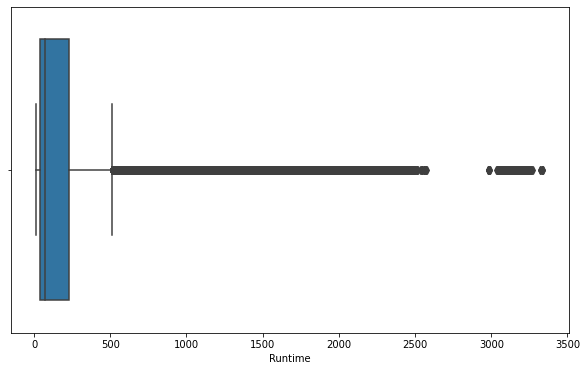

In [16]:
plt.figure(figsize=(10,6))


sns.boxplot(dataset['Runtime'])

In [17]:
from seaborn.utils import iqr
#removing outliers
Q1 = dataset['Runtime'].quantile(0.25)
Q2 = dataset['Runtime'].quantile(0.75)
IQR = Q2-Q1
ll=Q1-1.5*IQR
ul=Q2+1.5*IQR
dataset = dataset[(dataset.Runtime>ll)&(dataset.Runtime<ul)]
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


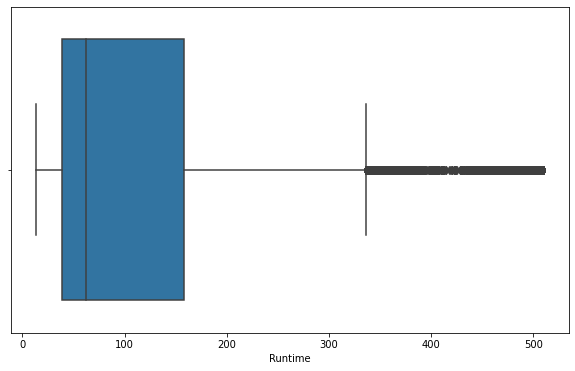

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(dataset['Runtime'])

## **Exploratory Data Analysis**

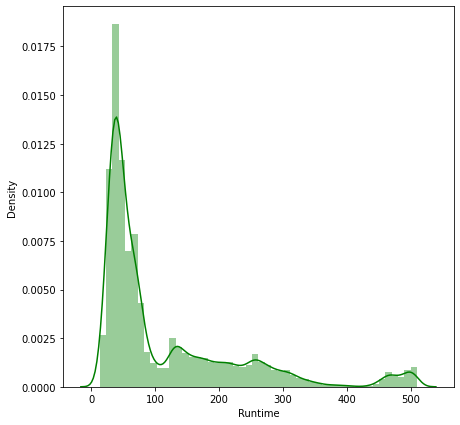

In [19]:
#Dependent Variable 
plt.figure(figsize=(7,7))
sns.distplot(dataset['Runtime'], color='green')

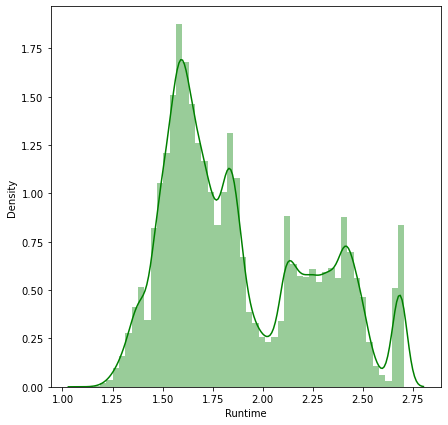

In [20]:
#Dependent Variable 
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['Runtime']), color='green')

In [21]:
numeric_features = dataset.describe().columns
numeric_features

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Runtime'],
      dtype='object')

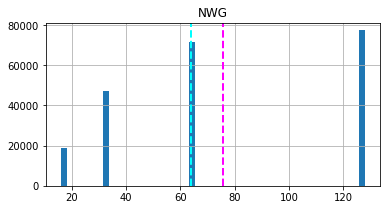

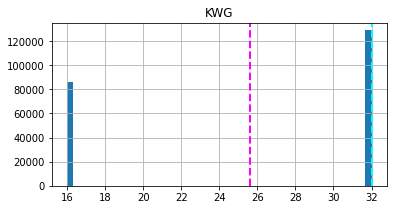

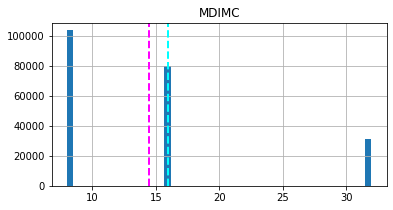

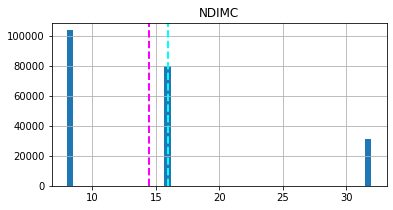

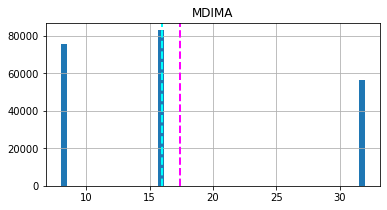

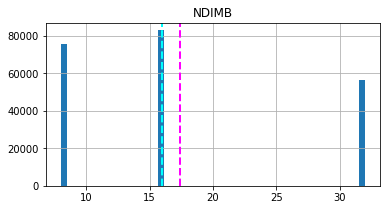

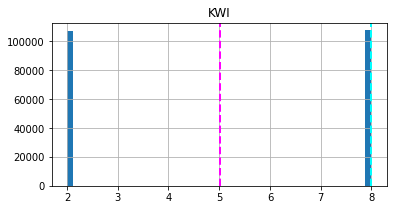

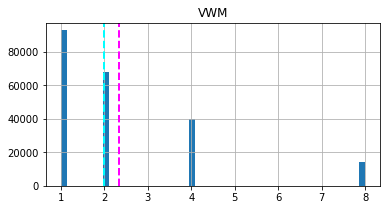

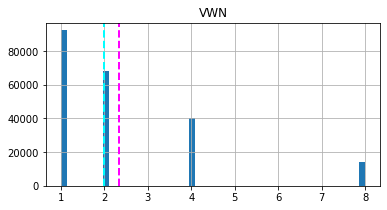

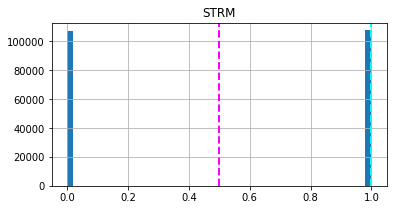

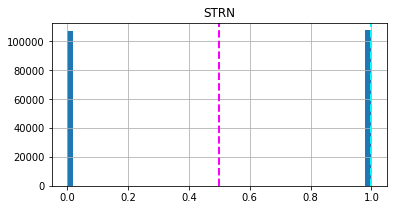

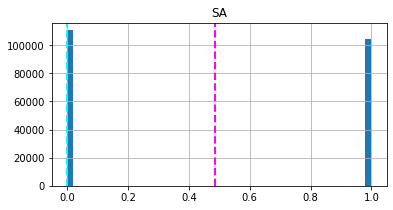

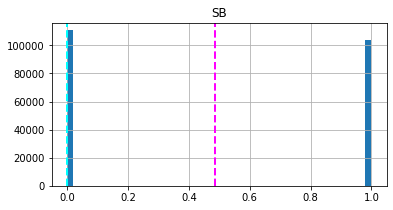

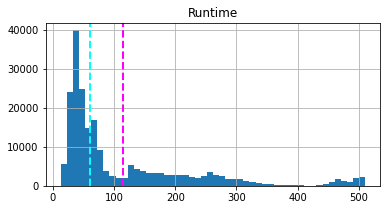

In [22]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

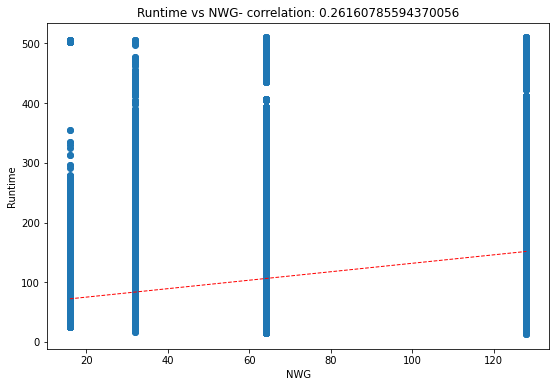

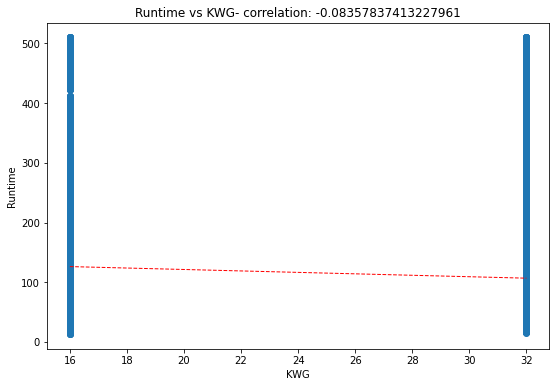

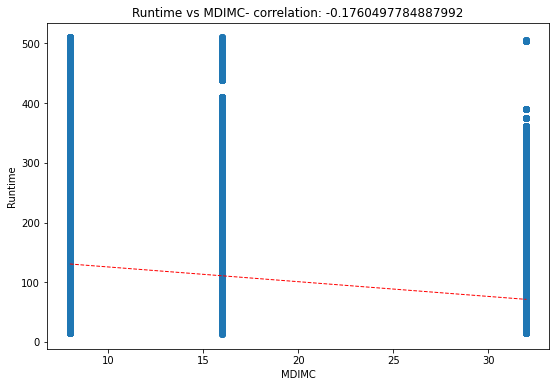

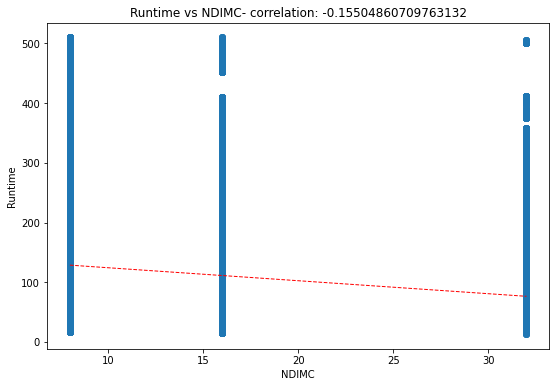

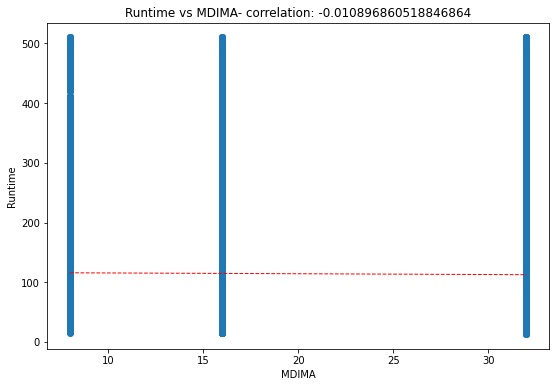

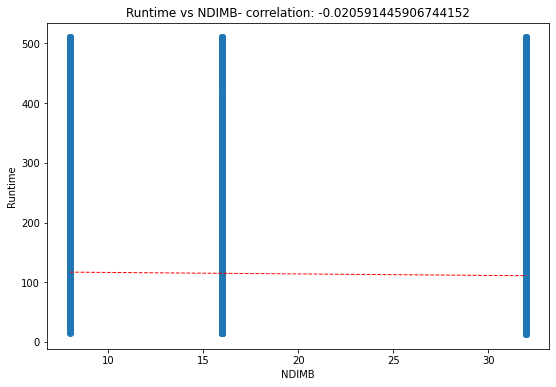

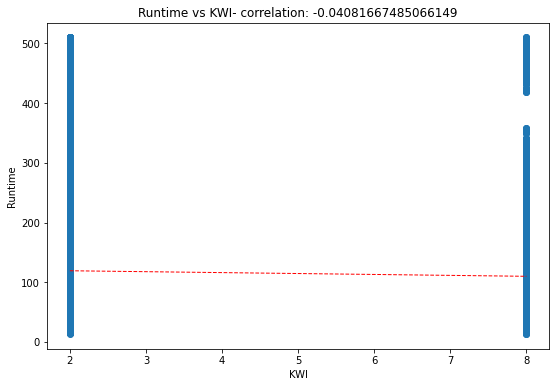

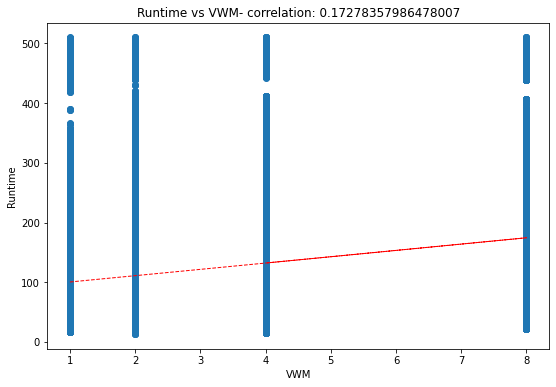

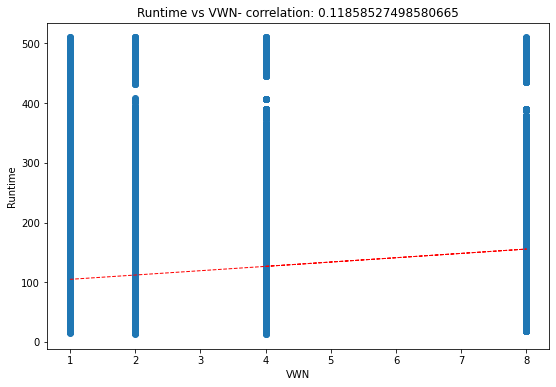

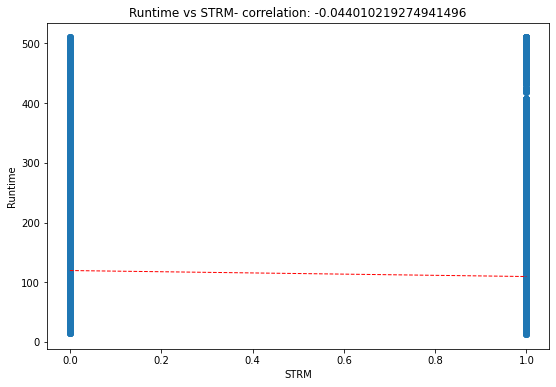

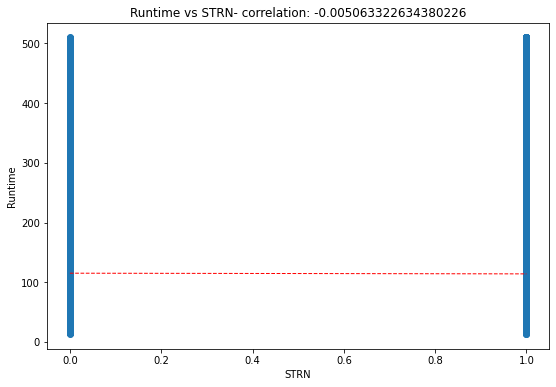

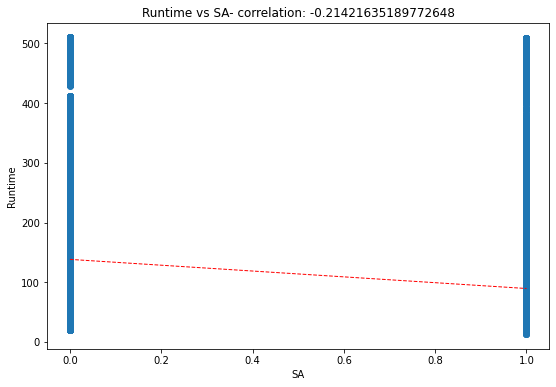

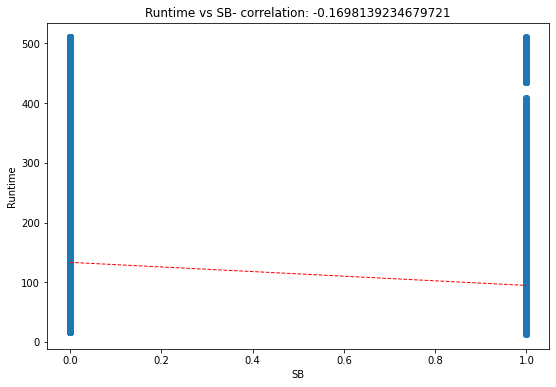

In [23]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Runtime']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Runtime')
    ax.set_title('Runtime vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Runtime'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

Text(0.5, 1.0, 'Variable Correlation')

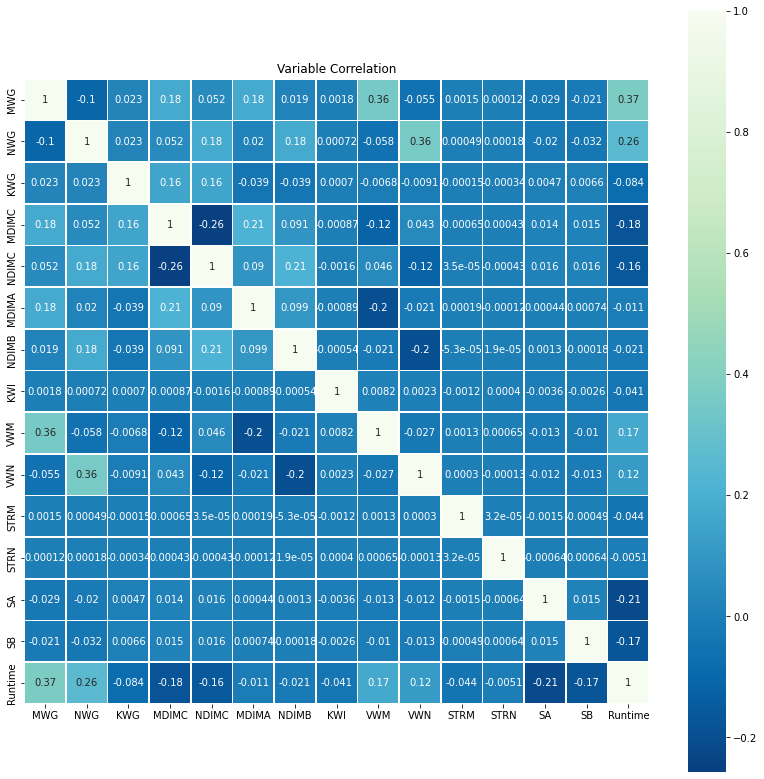

In [24]:
#corelation
plt.figure(figsize=(14,14))
#sns.set(front_scale=1)
sns.heatmap(dataset.corr(),cmap='GnBu_r',annot=True, square=True, linewidths=.5);
plt.title('Variable Correlation')

## **Multicollinearity**

In [26]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [29]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Runtime']]])

,variables,VIF
0,MWG,5.501680
1,NWG,5.516706
2,KWG,9.532446
3,MDIMC,5.377897
4,NDIMC,5.372227
5,MDIMA,4.887200
6,NDIMB,4.886987
7,KWI,3.479816
8,VWM,3.127916
9,VWN,3.131666
